https://www.kaggle.com/code/prena0808/exploratory-data-analysis-for-nutrition-value

In [ ]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px #data visualization
from wordcloud import WordCloud

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving India_Menu.csv to India_Menu.csv


In [ ]:
df = pd.read_csv('India_Menu.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Menu Category           141 non-null    object 
 1   Menu Items              141 non-null    object 
 2   Per Serve Size          141 non-null    object 
 3   Energy (kCal)           141 non-null    float64
 4   Protein (g)             141 non-null    float64
 5   Total fat (g)           141 non-null    float64
 6   Sat Fat (g)             141 non-null    float64
 7   Trans fat (g)           141 non-null    float64
 8   Cholesterols (mg)       141 non-null    float64
 9   Total carbohydrate (g)  141 non-null    float64
 10  Total Sugars (g)        141 non-null    float64
 11  Added Sugars (g)        141 non-null    float64
 12  Sodium (mg)             140 non-null    float64
dtypes: float64(10), object(3)
memory usage: 14.4+ KB


In [ ]:
df.nunique()

Menu Category               7
Menu Items                141
Per Serve Size            107
Energy (kCal)             139
Protein (g)               117
Total fat (g)             111
Sat Fat (g)               107
Trans fat (g)              41
Cholesterols (mg)         113
Total carbohydrate (g)    133
Total Sugars (g)          125
Added Sugars (g)           79
Sodium (mg)               139
dtype: int64

In [ ]:
df.shape

(141, 13)

In [ ]:
df.columns

Index(['Menu Category', 'Menu Items', 'Per Serve Size', 'Energy (kCal)',
       'Protein (g)', 'Total fat (g)', 'Sat Fat (g)', 'Trans fat (g)',
       'Cholesterols (mg)', 'Total carbohydrate (g)', 'Total Sugars (g)',
       'Added Sugars (g)', 'Sodium (mg)'],
      dtype='object')

In [ ]:
df.describe()

,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,140.000000
mean,244.635461,7.493546,9.991702,4.997589,0.687163,26.350071,31.190284,15.464894,10.336950,362.064143
std,185.554837,8.336863,10.339511,4.900451,6.326136,50.334200,20.602044,15.690202,14.283388,473.160490
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,116.360000,0.650000,0.460000,0.280000,0.060000,1.510000,15.740000,2.330000,0.000000,43.895000
50%,219.360000,4.790000,7.770000,4.270000,0.150000,8.390000,30.820000,9.160000,3.640000,152.025000
75%,339.520000,10.880000,14.160000,7.280000,0.220000,31.110000,46.000000,26.950000,19.230000,534.240000
max,834.360000,39.470000,45.180000,20.460000,75.260000,302.610000,93.840000,64.220000,64.220000,2399.490000


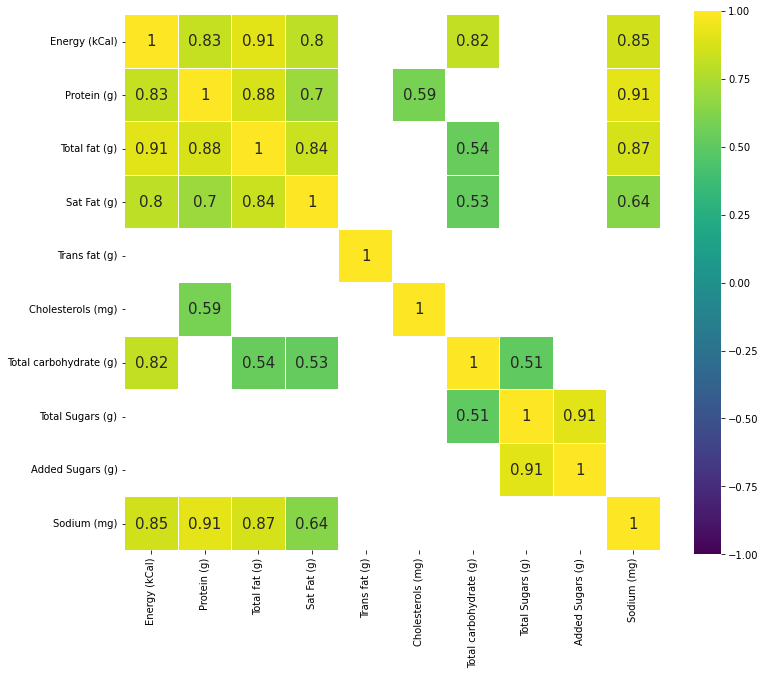

In [ ]:
corr = df.drop(['Menu Category', 'Menu Items'], axis=1).corr() #we already examined SalePrice correlations
plt.figure(figsize=(12,10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)],cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,annot_kws={"size": 15}, annot=True, square=True);
#annot_kws={"size:8"} ; 글씨 크기

In [ ]:
#heatmap: 데이터의 배열을 색상으로 표현.
#seaborn의 heatmap

#heatmap의 기본문법
df= sns.heatmap(df, #데이터
                vmin=100, #최솟값,
                vmax=700, #최댓값,
                cbar=True, #colorbar의 유무
                center=400, #중앙값 선정
                linewidths=0.5, #cell사이에 선을 집어 넣는다
                annot=True, fmt="d" #각 cell의 값 표기 유무, 그 값의 데이터 타입 설정
                cmap='Blues' #히트맵의 색을 설정)

#최솟값을 200으로 설정했기 때문에 200 이하는 모두 검은색
#최댓값을 500으로 설정했기 때문에 500 이상은 모두 흰색

#cbar: colorbar의 유무 설정
#참고자료
#https://dsbook.tistory.com/51

Text(0.5, 1.0, 'Total fat mark')

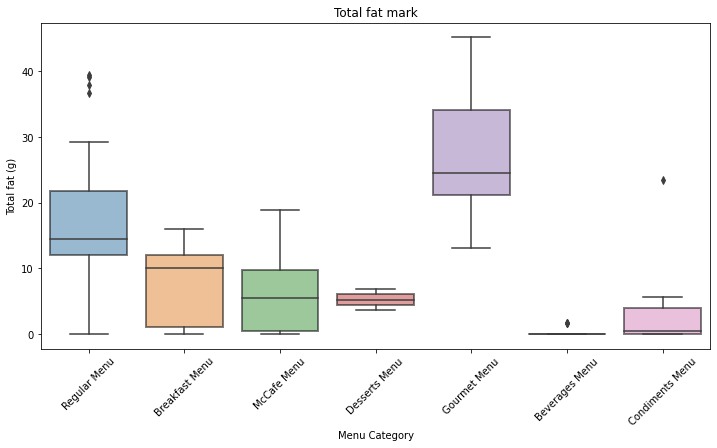

In [ ]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='Menu Category', y='Total fat (g)', data=df)

plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k") #edgecolor:테두리 k=black
plt.xticks(rotation=45)
plt.title('Total fat mark')

Text(0.5, 1.0, 'Cholesterols mark')

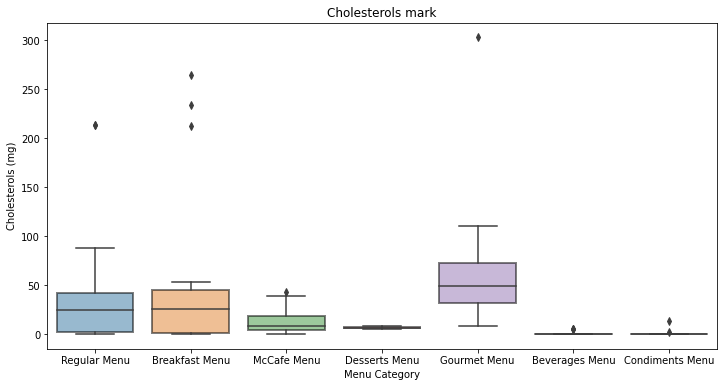

In [ ]:
plt.figure(figsize = (12,6))
ax = sns.boxplot(x='Menu Category', y='Cholesterols (mg)', data=df)

plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor='k')
plt.xticks(rotation=45)
plt.title('Cholesterols mark')

Text(0.5, 1.0, 'Total sugars mark')

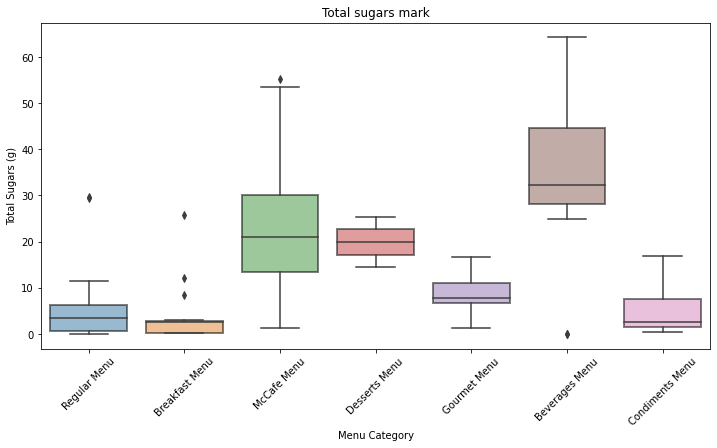

In [ ]:
plt.figure(figsize = (12,6))
ax = sns.boxplot(x='Menu Category', y='Total Sugars (g)', data=df)

plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor='k')
plt.xticks(rotation=45)
plt.title('Total sugars mark')

Text(0.5, 1.0, 'Sodium mark')

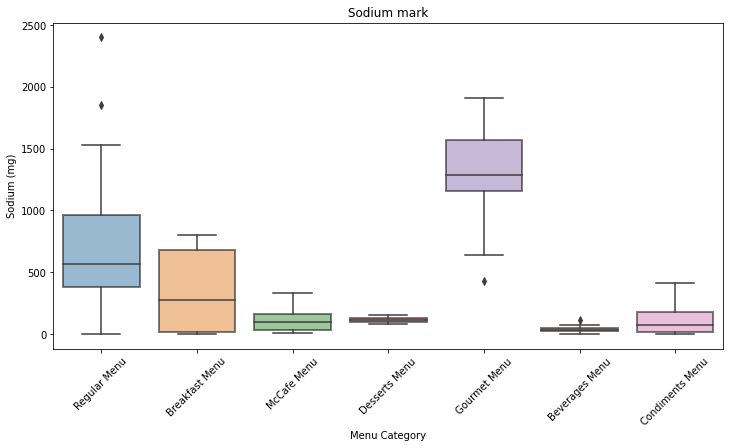

In [ ]:
plt.figure(figsize = (12,6))
ax = sns.boxplot(x='Menu Category', y='Sodium (mg)', data=df)

plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor='k')
plt.xticks(rotation=45)
plt.title('Sodium mark')

Text(0.5, 1.0, 'Energy mark')

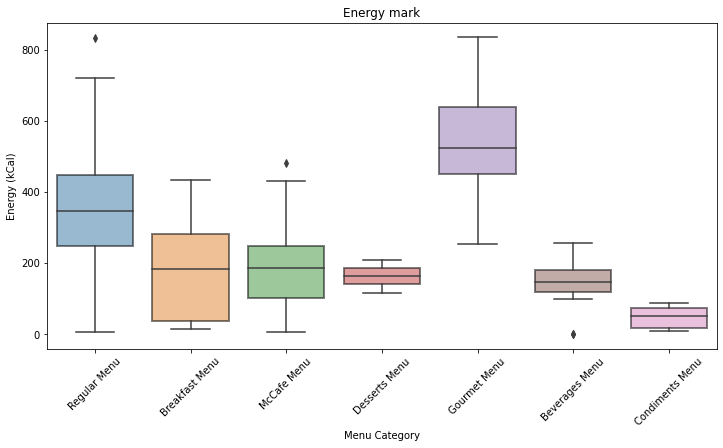

In [ ]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='Menu Category', y='Energy (kCal)', data=df)

plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor='k')
plt.xticks(rotation=45)
plt.title('Energy mark')

Text(0.5, 1.0, 'Protein mark')

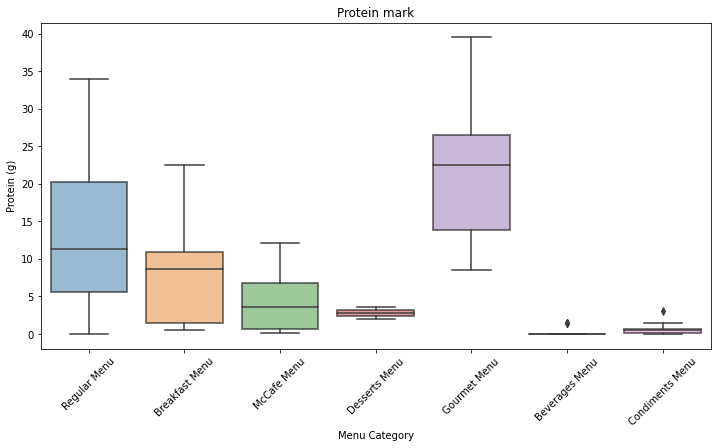

In [ ]:
plt.figure(figsize = (12,6))
ax = sns.boxplot(x='Menu Category', y='Protein (g)', data=df)

#선 두께, 색 등 좀 더 다양한 조정을 위해서 setp() 명령어
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor='k') #alpha: 투명도(0~!)까지
plt.xticks(rotation=45)
plt.title('Protein mark')

plt.figure(figsize =( , ) #matplotlib 차트의 기본 크기 설정



fig = px.scatter(df, x="sepal_width", y="sepal_length",

                size='petal_length', # petal_length 에 따라 크기를 변화

                 color="species", # Species 열의 값에 따라서 색깔 표현

                 hover_data=['petal_width'], # 참고할 데이터 추가

                 title='Iris Data - Scatter Plot' # 그래프 타이틀 지정
                )
fig.show()


In [ ]:
px.scatter(df, x='Total fat (g)', y='Sodium (mg)',
           size='Total Sugars (g)', #'Total Sugars'에 따라 크기 변화
           color='Menu Category', #'Menu Category' 열의 값에 따라서 색깔 표현
           hover_name='Menu Items', 
           log_x=True, size_max=60)

#hover_names: 마우스를 마커에 가져다 놓을 때 나타나는 타이틀인 hover_name 인자를 Menu Items로 설정